In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import matplotlib.pyplot as plt
from PIL import Image
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter
from stop_words import get_stop_words
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import os
print(os.listdir("../input"))

['twitter_mask.png', 'NLP Dataset.csv']


In [12]:
df = pd.read_csv("../input/NLP Dataset.csv")
img = Image.open("../input/twitter_mask.png")

In [13]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

def preprocess(list_of_X, custom_stop = [], lemmatize = False):
    en_stop = get_stop_words('english')
    en_stop.extend(custom_stop)
    tokenizer = TreebankWordTokenizer()
    list_of_X = list_of_X.apply(lambda row: row.lower())
    list_of_X = list_of_X.apply(lambda row: tokenizer.tokenize(row))
    list_of_X = list_of_X.apply(lambda row: [i for i in row if i not in en_stop])
    list_of_X = list_of_X.apply(lambda row: [i for i in row if i not in string.punctuation])
    list_of_X = list_of_X.apply(lambda row:' '.join([word for word in row]))
    if lemmatize == True:
        list_of_X = list_of_X.apply(lambda row: lemmatize_sentence(row))
    return list_of_X

def create_word_cloud(dataframe):
    mask_twitter = np.array(img)
    wordcloud = WordCloud(width = 512, height = 512,mask=mask_twitter, background_color='White')
    wordcloud.generate(" ".join([row for row in dataframe]))
    plt.figure(figsize=(15,12),facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear",)
    plt.axis("off")
    plt.show()

			 Raw Data
------------------------------------------------------------
0     Awesome START for Data Science journey!!! Than...
1     Thanks Bhavesh for inspiring us to aim for sim...
2         Thank you sir for your support and knowledge.
3     Thanks Bhavesh for making ML a great learning ...
4     The ultimate guide or the perfect mentor? What...
5     Your infectious enthusiasm about the subject s...
6                           Machine Learning Made Easy!
7     Thank you very much for you guidance in the Da...
8     Bhavesh you are my inspiration to write blogs,...
9     Thanks bhavesh for everything you taught me du...
10    Thank you Bhavesh  for coming back and for tak...
11    Dear Bhavesh,  "Teaching is not everyone's cup...
12    "Bhavesh,  It's very rare that people share kn...
13    Message to Bhavesh: \nIt wouldn't have been po...
Name: Text, dtype: object


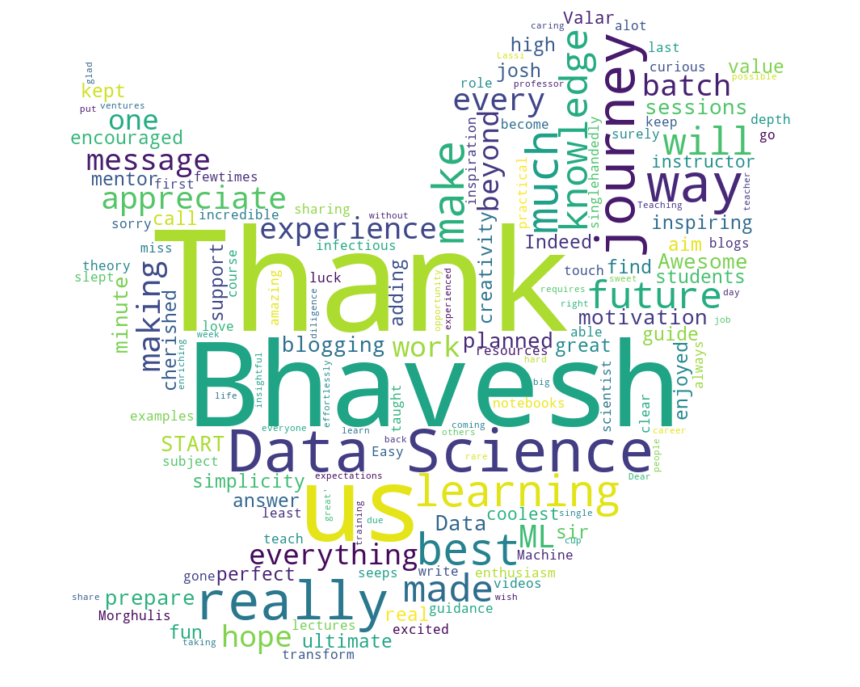

In [14]:
print("\t"*3,"Raw Data")
print("--"*30)
print(df['Text'])
create_word_cloud(df['Text'])

	 Preprocessed Data (without lemmatization)
------------------------------------------------------------
0     awesome start really appreciate way planned pr...
1     inspiring aim simplicity real creativity makin...
2                                 sir support knowledge
3     making ml great learning experience batch. ind...
4     ultimate guide perfect mentor call find answer...
5     infectious enthusiasm subject seeps singlehand...
6                            machine learning made easy
7     much guidance science. love way teach. able tr...
8     inspiration write blogs make videos make incre...
9     everything taught course. always gone beyond e...
10    coming back taking effortlessly one best teach...
11    dear `` teaching everyone cup `` lassi '' made...
12    `` rare people share knowledge others right wa...
13    message n't possible without learn much every ...
Name: Text, dtype: object


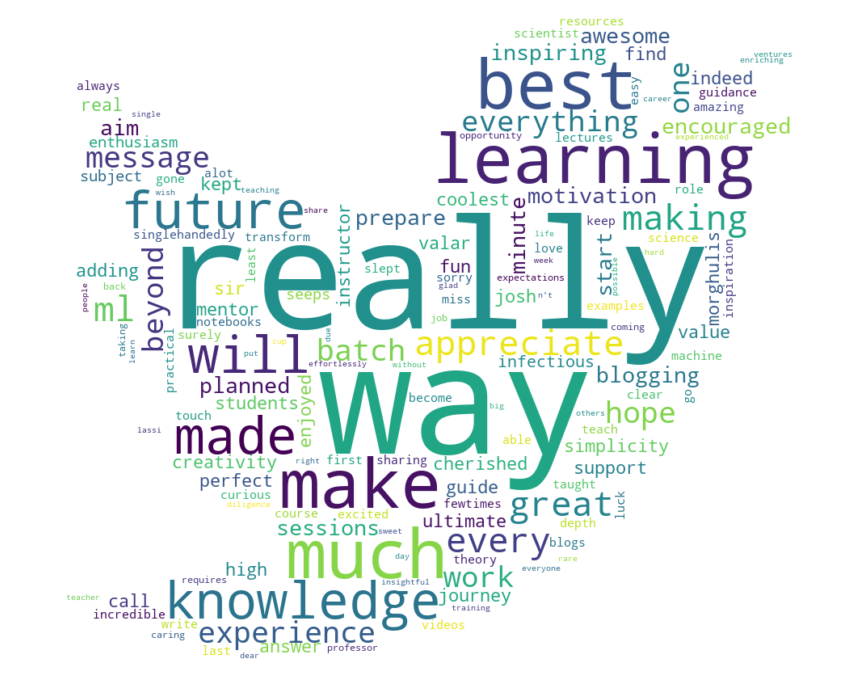

In [24]:
df1 = df.copy()
df1['Text'] = preprocess(df1['Text'])
print("\t"*1,"Preprocessed Data (without lemmatization)")
print("--"*30)
print(df1['Text'])
create_word_cloud(df1['Text'])

	 Preprocessed Data (with lemmatization)
------------------------------------------------------------
0     awesome start really appreciate way plan prepa...
1     inspire aim simplicity real creativity make le...
2                                 sir support knowledge
3     make ml great learn experience batch . indeed ...
4     ultimate guide perfect mentor call find answer...
5     infectious enthusiasm subject seeps singlehand...
6                               machine learn make easy
7     much guidance science . love way teach . able ...
8     inspiration write blog make video make incredi...
9     everything taught course . always go beyond ex...
10    come back take effortlessly one best teacher h...
11    dear `` teach everyone cup `` lassi '' make re...
12    `` rare people share knowledge others right wa...
13    message n't possible without learn much every ...
Name: Text, dtype: object


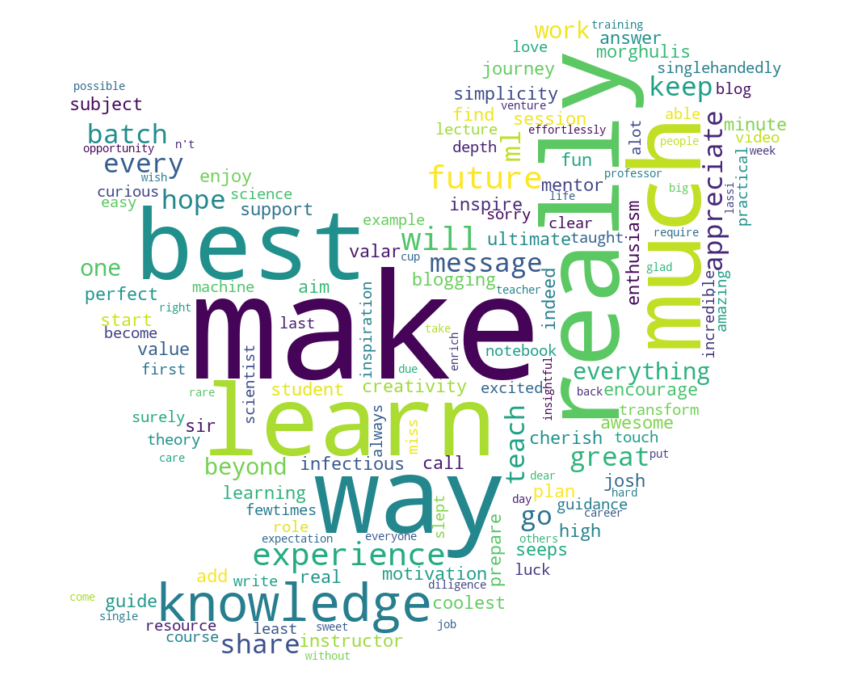

In [27]:
custom_stopwords = ['bhavesh','thank','thanks','data','science','journey','batch','us',"'s",'.',',']
df2 = df.copy()
df2['Text'] = preprocess(df1['Text'], custom_stop = custom_stopwords, lemmatize=True)
print("\t"*1,"Preprocessed Data (with lemmatization)")
print("--"*30)
print(df2['Text'])
create_word_cloud(df2['Text'])

In [26]:
# Word counts before preprocessing
all_words = TreebankWordTokenizer().tokenize(df2['Text'].sum())
word_counts = Counter(all_words)
print(word_counts)

Counter({'.': 12, 'make': 8, 'really': 4, 'way': 4, 'learn': 4, 'best': 4, 'experience': 3, 'much': 3, 'future': 3, "''": 3, 'will': 3, '``': 3, 'appreciate': 2, 'every': 2, 'ml': 2, 'keep': 2, 'hope': 2, 'share': 2, 'knowledge': 2, 'teach': 2, 'like': 2, 'go': 2, 'beyond': 2, 'work': 2, 'one': 2, 'awesome': 1, 'start': 1, 'plan': 1, 'prepare': 1, 'minute': 1, 'session': 1, 'motivation': 1, 'blogging': 1, 'encourageinspire': 1, 'aim': 1, 'simplicity': 1, 'real': 1, 'creativity': 1, 'learning': 1, 'fun': 1, '...': 1, 'sir': 1, 'support': 1, 'knowledgemake': 1, 'great': 1, 'batch': 1, 'indeed': 1, 'josh': 1, 'highultimate': 1, 'guide': 1, 'perfect': 1, 'mentor': 1, 'call': 1, 'find': 1, 'answer': 1, 'message': 1, 'add': 1, 'value': 1, 'journey': 1, 'enjoy': 1, 'student': 1, 'cherish': 1, 'instructor': 1, 'coolest': 1, 'valar': 1, 'morghulis': 1, "''infectious": 1, 'enthusiasm': 1, 'subject': 1, 'seeps': 1, 'singlehandedly': 1, 'curious': 1, 'excited': 1, 'depth': 1, 'resourcemachine': 1,

In [21]:

def create_count_vector(messages):
    count_vect = CountVectorizer()
    count_vect_data = count_vect.fit_transform(messages) 
    # create pandas dataframe 
    return pd.DataFrame(count_vect_data.toarray(), columns=count_vect.get_feature_names())
create_count_vector(df2['Text'])

,able,add,aim,all,alot,always,amazing,answer,appreciate,awesome,back,batch,become,best,beyond,big,blog,blogging,call,care,career,cherish,clear,come,coolest,course,creativity,cup,curious,day,dear,depth,diligence,due,easy,effortlessly,encourage,enjoy,enrich,enthusiasm,...,resource,right,role,science,scientist,seeps,session,share,simplicity,single,singlehandedly,sir,slept,sorry,start,student,subject,support,surely,sweet,take,taught,teach,teacher,theory,touch,training,transform,ultimate,valar,value,venture,video,way,week,will,wish,without,work,write
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0
8,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [22]:
def create_tfidf_vector(messages):
    tfidf_vect = TfidfVectorizer()
    tfidf_vect_data = tfidf_vect.fit_transform(messages)
    # create pandas dataframe 
    tfidf_vect_dataframe = pd.DataFrame(tfidf_vect_data.toarray(), columns=tfidf_vect.get_feature_names()) 
    tfidf_vect_dataframe = tfidf_vect_dataframe.sort_values(by=tfidf_vect_dataframe.columns.tolist(), ascending=False)
    return tfidf_vect_dataframe
create_tfidf_vector(df2['Text'])

,able,add,aim,all,alot,always,amazing,answer,appreciate,awesome,back,batch,become,best,beyond,big,blog,blogging,call,care,career,cherish,clear,come,coolest,course,creativity,cup,curious,day,dear,depth,diligence,due,easy,effortlessly,encourage,enjoy,enrich,enthusiasm,...,resource,right,role,science,scientist,seeps,session,share,simplicity,single,singlehandedly,sir,slept,sorry,start,student,subject,support,surely,sweet,take,taught,teach,teacher,theory,touch,training,transform,ultimate,valar,value,venture,video,way,week,will,wish,without,work,write
7,0.223388,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172029,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.223388,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.223388,0.223388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193345,0.000000,0.223388,0.223388,0.000000,0.223388,0.00000,0.00000,0.00000,0.000000,0.000000,0.344059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.22952,0.000000,0.000000,0.000000,0.000000,0.000000,0.22952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.22952,0.000000,0.000000,0.22952,0.000000,0.000000,0.22952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.22952,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.22952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.22952,0.22952,0.22952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.00000,0.370325,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.370325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.00000,0.000000,0.292174,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.292174,0.000000,0.000000,0.450002,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.292174,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292174,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.292174,0.000000,0.000000,0.292174,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.292174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.00000,0.000000,0.000000,0.216887,0.000000,0.216887,0.00000,0.000000,0.000000,0.000000,0.000000,0.216887,0.000000,0.000000,0.000000,0.216887,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.216887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216887,0.216887,0.000000,0.00000,0.000000,0.000000,0.216887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [23]:
df.head(15)

,Text,Class
0,Awesome START for Data Science journey!!! Than...,Trupti
1,Thanks Bhavesh for inspiring us to aim for sim...,Jyoti
2,Thank you sir for your support and knowledge.,Hemendrakumar
3,Thanks Bhavesh for making ML a great learning ...,Pankhil
4,The ultimate guide or the perfect mentor? What...,Juhi Patel
5,Your infectious enthusiasm about the subject s...,Hirak
6,Machine Learning Made Easy!,Suchita
7,Thank you very much for you guidance in the Da...,Shailendra
8,"Bhavesh you are my inspiration to write blogs,...",Rumana
9,Thanks bhavesh for everything you taught me du...,Musab
